# Amount of Liscenses Needed as a Percentage of Total Playerbase

## 1) Introduction 

In this project, we are tasked by a computer science research group to analyze data that they have collected. This data is obtained through their minecraft server, in which the player's actions are recorded and stored in datasets, for further analysis. Our key role is to help the research group determine the amount of resources they need to maintain the minecraft server, such as the number of software licenses. Our group chose to answer the second question, which is that: "**We are interested in demand forecasting, namely, what time windows are most likely to have large number of simultaneous players. This is because we need to ensure that the number of licenses on hand is sufficiently large to accommodate all parallel players with high probability**". To answer this question, our group used both the players and sessions datasets to answer the question. 

The players data is a dataset with 9 variables and 196 rows of observations, with the following variables:
- experience (chr): describes the users experience level in minecraft
- subscribe (lgl): whether the user is subscribed or not
- hashedEmail (chr): consists of the user's emails, but hashed into a unique character string
- played_hours (dbl): represent the hours spent playing by the user
- name (chr): represent the name of the user
- gender (chr): represents the gender of the user
- age (dbl): represents the age of the yser
- individualId, organizationName (lgl): blank columns so no data analysis can be performed
  
We used the players data to determine the total number of minecraft players.
Next, the sessions dataset contains 5 variables and 1535 rows of observations, with the variables defined as such:
- hashedEmail (chr): consists of the user's emails, but hashed into a unique character string
- start_time (chr): represent the starting time of the user (when logged in) in a day/month/year time format
- end_time (chr): represent the ending time of the user (when logged out) in a day/month/year time format
- original_start_time (dbl): represents the starting time of the user(when logged in) in UNIX 
- original_end_time (dbl): represents the ending time of the user (when logged out) in UNIX
  
The wrangling needed to clean the datasets has already been completed in our individual planning stages. The sessions dataset takes the main role in our project, in which we use the start and stop times to overall determine the number of licenses to provide.

## 2) Methods and Results

### Loading in the libraries

In [6]:
library(tidyverse)
library(repr)
library(rvest)
library(tidymodels)
library(stringr)
library(janitor)
options(repr.matrix.max.rows = 6)

── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.6     ✔ rsample      1.2.1
✔ dials        1.3.0     ✔ tune         1.1.2
✔ infer        1.0.7     ✔ workflows    1.1.4
✔ modeldata    1.4.0     ✔ workflowsets 1.0.1
✔ parsnip      1.2.1     ✔ yardstick    1.3.1
✔ recipes      1.1.0     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed()
✖ dplyr::lag()      masks stats::lag()
✖ yardstick::spec() masks readr::spec()
✖ recipes::step()   masks stats::step()
• Learn how to get started at https://www.tidymodels.org/start/



### Loading in and wrangling the datasets

In [3]:
players_url <- "https://drive.google.com/uc?export=download&id=1Mw9vW0hjTJwRWx0bDXiSpYsO3gKogaPz"
sessions_url <- "https://drive.google.com/uc?export=download&id=14O91N5OlVkvdGxXNJUj5jIsV5RexhzbB"
players <- read_csv(players_url)
players
sessions <- read_csv(sessions_url)
sessions

Rows: 196 Columns: 9
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, age
lgl (3): subscribe, individualId, organizationName

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,age,individualId,organizationName
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<lgl>,<lgl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9,NA,NA
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17,NA,NA
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17,NA,NA
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
Amateur,FALSE,d572f391d452b76ea2d7e5e53a3d38bfd7499c7399db299bd4fedb06a46ad5bb,0.0,Dylan,Prefer not to say,17,NA,NA
Amateur,FALSE,f19e136ddde68f365afc860c725ccff54307dedd13968e896a9f890c40aea436,2.3,Harlow,Male,17,NA,NA
Pro,TRUE,d9473710057f7d42f36570f0be83817a4eea614029ff90cf50d8889cdd729d11,0.2,Ahmed,Other,91,NA,NA


Rows: 1535 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): hashedEmail, start_time, end_time
dbl (2): original_start_time, original_end_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


hashedEmail,start_time,end_time,original_start_time,original_end_time
<chr>,<chr>,<chr>,<dbl>,<dbl>
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,30/06/2024 18:12,30/06/2024 18:24,1.71977e+12,1.71977e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,17/06/2024 23:33,17/06/2024 23:46,1.71867e+12,1.71867e+12
f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc,25/07/2024 17:34,25/07/2024 17:57,1.72193e+12,1.72193e+12
⋮,⋮,⋮,⋮,⋮
fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d,28/07/2024 15:36,28/07/2024 15:57,1.72218e+12,1.72218e+12
fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d,25/07/2024 06:15,25/07/2024 06:22,1.72189e+12,1.72189e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,20/05/2024 02:26,20/05/2024 02:45,1.71617e+12,1.71617e+12


In [4]:
sessions_wrangled <- separate(sessions, start_time, c("start_day", "start_month", "start_year", "start_hour", "start_min"))|>
    separate(end_time, c("end_day", "end_month", "end_year", "end_hour", "end_min"))|>
    mutate(start_day = as.numeric(start_day),
           start_month = as.numeric(start_month),
           start_year = as.numeric(start_year),
           start_hour = as.numeric(start_hour),
           start_min = as.numeric(start_min),
           end_day = as.numeric(end_day),
           end_month = as.numeric(end_month),
           end_year = as.numeric(end_year),
           end_hour = as.numeric(end_hour),
           end_min = as.numeric(end_min))

sessions_wrangled

hashedEmail,start_day,start_month,start_year,start_hour,start_min,end_day,end_month,end_year,end_hour,end_min,original_start_time,original_end_time
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,30,6,2024,18,12,30,6,2024,18,24,1.71977e+12,1.71977e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,17,6,2024,23,33,17,6,2024,23,46,1.71867e+12,1.71867e+12
f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc,25,7,2024,17,34,25,7,2024,17,57,1.72193e+12,1.72193e+12
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d,28,7,2024,15,36,28,7,2024,15,57,1.72218e+12,1.72218e+12
fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d,25,7,2024,6,15,25,7,2024,6,22,1.72189e+12,1.72189e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,20,5,2024,2,26,20,5,2024,2,45,1.71617e+12,1.71617e+12


In [5]:
players_wrangled <- select(players, -individualId, -organizationName) |>
    mutate(experience = as.factor(experience)) |>
    mutate(gender = as.factor(gender))
players_wrangled

experience,subscribe,hashedEmail,played_hours,name,gender,age
<fct>,<lgl>,<chr>,<dbl>,<chr>,<fct>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
⋮,⋮,⋮,⋮,⋮,⋮,⋮
Amateur,FALSE,d572f391d452b76ea2d7e5e53a3d38bfd7499c7399db299bd4fedb06a46ad5bb,0.0,Dylan,Prefer not to say,17
Amateur,FALSE,f19e136ddde68f365afc860c725ccff54307dedd13968e896a9f890c40aea436,2.3,Harlow,Male,17
Pro,TRUE,d9473710057f7d42f36570f0be83817a4eea614029ff90cf50d8889cdd729d11,0.2,Ahmed,Other,91


### Summary of datasets

### Visualization of datasets

In [10]:
total_players <- nrow(players_wrangled)
total_players

[1] 196

There are 196 players playing signed up for the study.

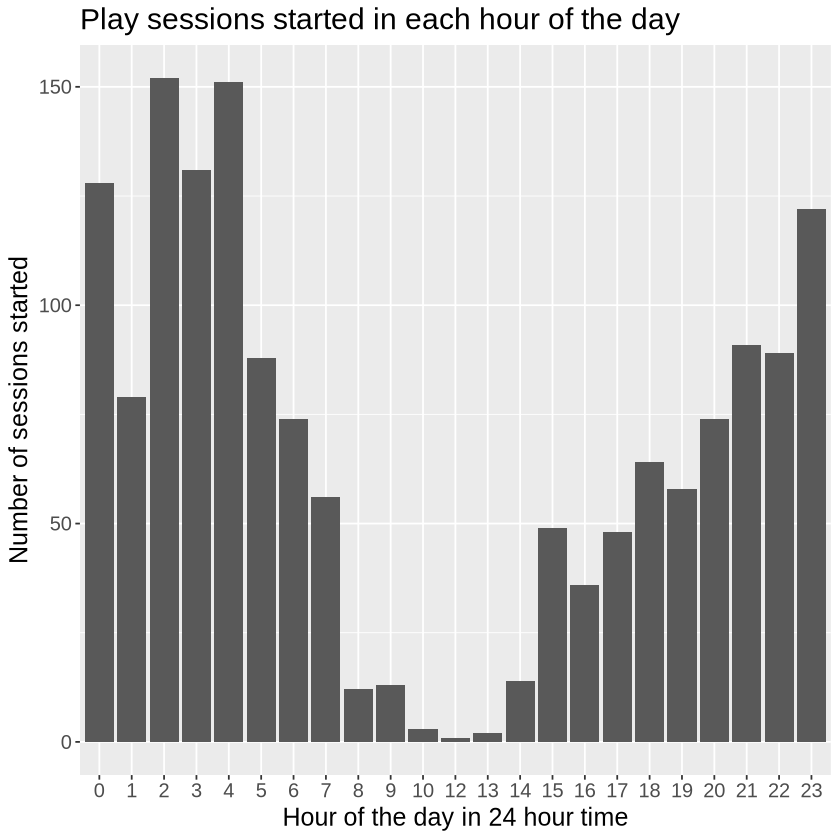

In [11]:
sessions_hours <- mutate(sessions_wrangled, start_hour = as.factor(start_hour)) |>
    ggplot(aes(x = start_hour)) +
    geom_bar() +
    labs(y = "Number of sessions started", x = "Hour of the day in 24 hour time", title = "Play sessions started in each hour of the day") +
    theme(text = element_text(size = 15))
sessions_hours

This graph shows most sessions start between the evening and early morning. We can expect the largest amount of required liscenses to be around this time range.

### Creating and validating the model